<a href="https://colab.research.google.com/github/Namesakenberg/Deep_Learning/blob/main/EWMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EMWA is exponential moving weighted average , mostly used in time series data to understand and calculate the moving average

in emwa , a beta parameter is used , beta is used to give importance to the previous values of weighted average , higher the value of beta more weight is given to the previous values as well , hence for the larger value of beta the curve is smooth and for a smaller value beta the curve is spikey

## EMWA is important to understand as it is used as a optimizer in deep learning


In [ ]:
# myEMWA

In [16]:
# calculating emwa
def my_emwa(beta ,series):
  ans = []
  vt = 0
  for i in series:
    vt =  (beta * vt )+ (1-beta)*i
    ans.append(vt)
  return ans

In [17]:
data = [10, 12, 13, 15, 20]
beta = 0.9
my_emwa(0.9,data)

[0.9999999999999998,
 2.0999999999999996,
 3.1899999999999995,
 4.370999999999999,
 5.933899999999999]

In [ ]:
# pandas emwa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/DailyDelhiClimateTest.csv')

In [3]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [4]:
df = df[['date' , 'meantemp']]

In [5]:
df

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889
...,...,...
109,2017-04-20,34.500000
110,2017-04-21,34.250000
111,2017-04-22,32.900000
112,2017-04-23,32.875000


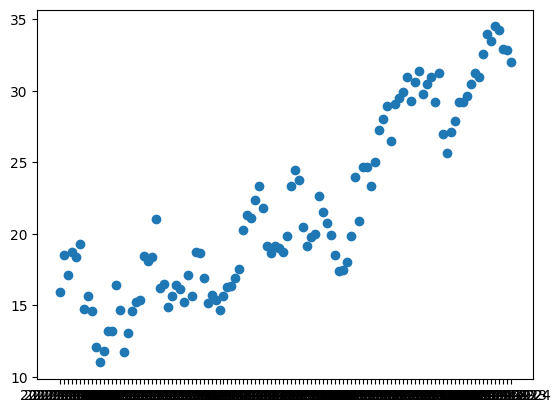

In [6]:
plt.scatter(df['date'] , df['meantemp'])

In [19]:
# pandas emwa
emwa = df['meantemp'].ewm(alpha=0.9).mean()     # alpha = beta-1
emwa

,meantemp
0,15.913043
1,18.264822
2,17.225443
3,18.552677
4,18.405266
...,...
109,34.403401
110,34.265340
111,33.036534
112,32.891153


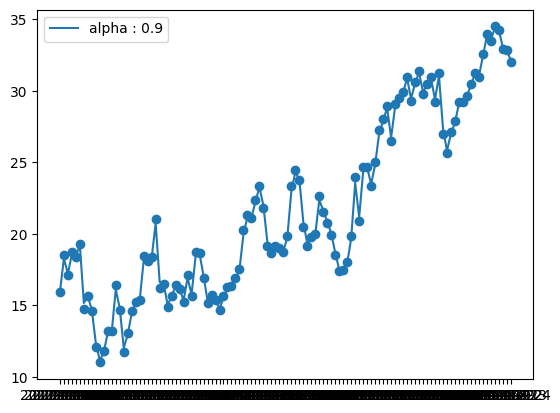

In [20]:
plt.scatter(df['date'] , df['meantemp'])
plt.plot(df['date'] , emwa,label='alpha : 0.9')
plt.legend()
plt.show()